# Предсказание стоимости недвижимости в Москве
### ==========================Импорт Библиотек==========================

In [5]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler


# Метрика
from sklearn.metrics import r2_score as r2

# Magic commands
%matplotlib inline 
# вывод графики в ноутбук
%config InlineBackend.figure_format = 'svg' 
# более четкое отображение, формат фала фигуры svg

### ==========================Исходные Датасеты==========================

In [63]:
df_train = pd.read_csv('import/train.csv') # загружаем тренировочный датасет в датафрейм df_train
df_test = pd.read_csv('import/test.csv') # загружаем тестовый датасет в датафрейм df_test

#TRAIN_DATASET_PATH = './realestatepriceprediction/train.csv'
#TEST_DATASET_PATH = './realestatepriceprediction/test.csv'
#df_train = pd.read_csv(TRAIN_DATASET_PATH) # загружаем тренировочный датасет в датафрейм df_train
#df_test = pd.read_csv(TEST_DATASET_PATH) # загружаем тестовый датасет в датафрейм df_test

In [ ]:
df_train

In [43]:
lifeSquare_mean = X['LifeSquare'].mean()
healthcare_1_median = X['LifeSquare'].median()
X["LifeSquare"].fillna(lifeSquare_mean, inplace=True)
X["Healthcare_1"].fillna(healthcare_1_median, inplace=True)

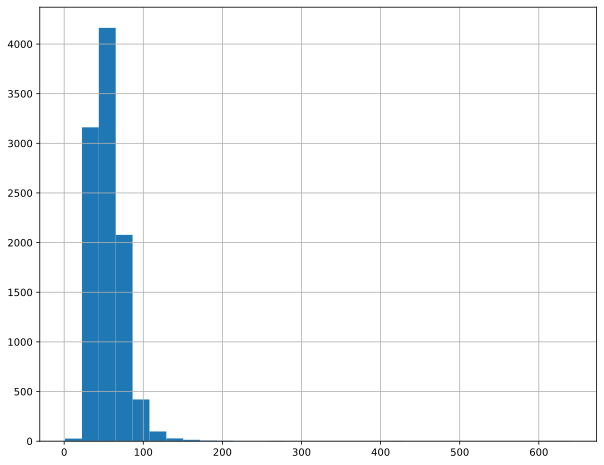

In [17]:
plt.figure(figsize = (10, 8))

df_train['Square'].hist(bins=30)
#plt.ylabel('кол-во')
#plt.xlabel('цена')

In [58]:
#df_train['Square'][(df_train['Square'] > 200)].count()
#X = X[X['Square'] < 300].reset_index()
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,32.78126,0,11,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.00000,1,16,1
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.00000,1,3,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.00000,0,5,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.00000,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.00000,3,11,1
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,32.78126,0,5,0
9997,27,1.0,47.939008,37.199645,1.0,12,16.0,2015,0.072158,1,1,2,629,1,32.78126,0,0,0
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.00000,2,5,1


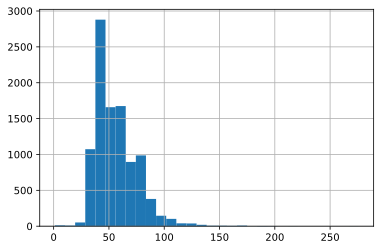

In [39]:
X['Square'].hist(bins=30)
#df_train['Square'].hist(bins=30)

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [62]:
#X
feature_names_for_stand = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1']
X[feature_names_for_stand]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,32.78126
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.00000
2,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.00000
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.00000
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,46,7960,6,350.00000
9996,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,30,5562,0,32.78126
9997,1.0,47.939008,37.199645,1.0,12,16.0,2015,0.072158,2,629,1,32.78126
9998,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,30,5048,9,325.00000
